# TELCO CUSTOMER CHURN

Business Objecttive

1) Analyze customer data to understand reason for churn and who could be the next potential customer to leave the company.

2) What contributes to the higher churn rate of customer and what could be some of the probable solution to address the same.

Content of the dataset

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

1) Customers who left within the last month – the column is called Churn.

2) Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device     protection, tech support, and streaming TV and movies.

3) Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly        charges, and total charges.

4) Demographic info about customers – gender, age range, and if they have partners and dependents

# Import Library

In [1]:
#importing the libraries

#Data Processing Libraries
import numpy as np
import pandas as pd

#Data Vizualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

# Machine Learning Library
from sklearn.preprocessing import LabelEncoder # Encode Categorical Variable to Numerical Variable
from sklearn.preprocessing import Imputer # Imputer Class to replace missing values
from sklearn.metrics import confusion_matrix # Library for model evaluation
from sklearn.metrics import accuracy_score # Library for model evaluation
from sklearn.model_selection import train_test_split # Library to split datset into test and train
from sklearn.linear_model  import LogisticRegression # Logistic Regression Classifier
from sklearn.ensemble  import RandomForestClassifier # Random Forest Classifier
from sklearn.svm import SVC #Support vector Machine Classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

#Ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

LOAD DATA

In [2]:
# Read .csv file from location and load into pandas DataFrame
dataset_churn = pd.read_csv('c:/WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns', None)

In [3]:
# Keeping a backup of original datset.Always a good practice
datset_churn_copy = dataset_churn.copy()

# Overview of data set

In [4]:
# Data set information
dataset_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
# Renaming the 3 columns.
dataset_churn = dataset_churn.rename(columns={'customerID' : 'CustomerID' , 'gender': 'Gender', 'tenure':'Tenure'})
print(dataset_churn.columns.values)

['CustomerID' 'Gender' 'SeniorCitizen' 'Partner' 'Dependents' 'Tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


Target Variable or The variable we want to predict is 'Churn'

Feature Variable - All Other columns (First 20 columnns)

Customers who left within the last month – 'Churn'

Customer Services – 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup' 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'

Customer Account information – 'Tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'

Customer Personal Information – 'Gender', 'SeniorCitizen', 'Partner', 'Dependents

In [6]:
# get some fill of data
dataset_churn.head(7)
# this will print first 7 rows from data frame

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


Observation -

TotalCharges is Numeric variables.
It's defines as object variable. We will convert it to numeric variable

In [7]:
dataset_churn['TotalChargesNum']=pd.to_numeric(dataset_churn['TotalCharges'])

ValueError: Unable to parse string " " at position 488

Observation - Column has " " . Let's find the columns containing spaces.

In [8]:
#Identifying the rows containing missing data
missing_value_row = list(dataset_churn[dataset_churn['TotalCharges'] == " "].index)
print('Missing Value Rows-->', missing_value_row , '\nTotal rows-->', len(missing_value_row))

Missing Value Rows--> [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754] 
Total rows--> 11


In [9]:
# Replacing the spaces with 0
for missing_row in missing_value_row :
    dataset_churn['TotalCharges'][missing_row] = 0

In [10]:
# Let's try to convert it back to Numeric
dataset_churn['TotalCharges']=pd.to_numeric(dataset_churn['TotalCharges'])

In [11]:
dataset_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
CustomerID          7043 non-null object
Gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
Tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

# Which features are numerical?
SeniorCitizen, Tenure, MonthlyCharges, TotalCharges

Continous - Tenure, MonthlyCharges, TotalCharges

Discrete - SeniorCitizen

# Which features are categorical?
PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, gender, Partner, Dependents

# Which features are Nominal or Ordinal ?
Ordinal data (variables with a meaningful order) - No.

Nominal data (categories that have no meaningful order) - All Columns.

# Which features are mixed data types?
None

# Understanding the summary statistics , central tendency and dispersion of dataset

Summary Statistics of Object/Categorical variable.

In [12]:
dataset_churn.describe(include=['O'])

,CustomerID,Gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,2263-SFSQZ,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


Summary Statistics of numeric variable.

In [13]:
dataset_churn.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Observations:
1) We have 4 numeric variables

2) Tenure can vary from 0 months to 72 months. This is how long customer is with Telco.

2) Total Charges = Monthly Charges * Tenure

3) Looking at the count column, all columns have count as 7043 .

In [14]:
#del datset_churn
dataset_churn._get_numeric_data().columns

Index(['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [15]:
# get numerical columns first
num_cols =dataset_churn._get_numeric_data().columns
print(num_cols)
# then find out categorical colums
cols = dataset_churn.columns

print( "categorical column")
dataset_churn_cat_column = list(set(cols) - set(num_cols))
print(dataset_churn_cat_column)

Index(['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
categorical column
['MultipleLines', 'DeviceProtection', 'Gender', 'TechSupport', 'OnlineBackup', 'OnlineSecurity', 'Dependents', 'Contract', 'StreamingTV', 'Partner', 'CustomerID', 'StreamingMovies', 'PaymentMethod', 'InternetService', 'PaperlessBilling', 'Churn', 'PhoneService']


In [16]:
# Printing Unique values in each categorical column
for col in dataset_churn_cat_column:
    print(col, "-", dataset_churn[col].unique())

MultipleLines - ['No phone service' 'No' 'Yes']
DeviceProtection - ['No' 'Yes' 'No internet service']
Gender - ['Female' 'Male']
TechSupport - ['No' 'Yes' 'No internet service']
OnlineBackup - ['Yes' 'No' 'No internet service']
OnlineSecurity - ['No' 'Yes' 'No internet service']
Dependents - ['No' 'Yes']
Contract - ['Month-to-month' 'One year' 'Two year']
StreamingTV - ['No' 'Yes' 'No internet service']
Partner - ['Yes' 'No']
CustomerID - ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
StreamingMovies - ['No' 'Yes' 'No internet service']
PaymentMethod - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
InternetService - ['DSL' 'Fiber optic' 'No']
PaperlessBilling - ['Yes' 'No']
Churn - ['No' 'Yes']
PhoneService - ['No' 'Yes']


# Observations :
1) Gender, Partner, Dependents, PhoneService, PaperlessBilling and Churn - They have 2 unique categories - Yes/No and for gender  Male/Female

2) MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract - They have 3 unique categories

3) Payment Method - 4 unique categories or 4 methods by which customer pays for their service

# Get missing values


In [17]:
print("Assess missing values in dataset")
total = dataset_churn.isnull().sum().sort_values(ascending=False)
percent = (dataset_churn.isnull().sum()/dataset_churn.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

Assess missing values in dataset
                  Total  Percent
Churn                 0      0.0
OnlineSecurity        0      0.0
Gender                0      0.0
SeniorCitizen         0      0.0
Partner               0      0.0
Dependents            0      0.0
Tenure                0      0.0
PhoneService          0      0.0
MultipleLines         0      0.0
InternetService       0      0.0
OnlineBackup          0      0.0
TotalCharges          0      0.0
DeviceProtection      0      0.0
TechSupport           0      0.0
StreamingTV           0      0.0
StreamingMovies       0      0.0
Contract              0      0.0
PaperlessBilling      0      0.0
PaymentMethod         0      0.0
MonthlyCharges        0      0.0
CustomerID            0      0.0


Observation - No missing values. But remember, we replaced columns with 0 values. We need data to be filled into that columns. Now let's find a way.

In [18]:
dataset_churn[['MonthlyCharges','Tenure','TotalCharges']].sample(20)

,MonthlyCharges,Tenure,TotalCharges
1210,69.00,17,1149.65
3350,44.15,1,44.15
2484,20.50,12,255.50
2260,80.10,3,217.55
2477,86.05,3,244.85
5931,98.00,13,1237.85
3280,58.60,55,3068.60
3240,106.55,54,5763.30
1420,99.80,60,5985.75
5005,104.70,39,4134.85


TotalCharges looks like close to product of MonthlyCharges & Tenure , although not exact but close.

We will replace the 0 values with ( MonthlyCharges * Tenure)

In [19]:
#Identifying the rows containing 0 value in Total Charges
zero_value_row = list(dataset_churn[dataset_churn['TotalCharges'] == 0].index)
print('0 Value Rows-->', missing_value_row , '\nTotal rows-->', len(missing_value_row))

0 Value Rows--> [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754] 
Total rows--> 11


In [20]:
#Validating the data
for zero_row in zero_value_row :
    print( dataset_churn['MonthlyCharges'][zero_row],dataset_churn['Tenure'][zero_row],dataset_churn['TotalCharges'][zero_row])

52.55 0 0.0
20.25 0 0.0
80.85 0 0.0
25.75 0 0.0
56.05 0 0.0
19.85 0 0.0
25.35 0 0.0
20.0 0 0.0
19.7 0 0.0
73.35 0 0.0
61.9 0 0.0


Interesting ! So Tenure is 0 for the cstomers with TotalCharges as 0, that initially had a space. We will leave it as it

# Univariate Analysis
# Vizualizing the Categorical variables with bar chart

In [21]:
#Removing the Numerical Variables
dataset_churn_cat_column.remove('CustomerID')


#Creating Column into 4X4 matrix to display 16 bar charts in 4X4 form:
columns_hist_nparray = np.array(dataset_churn_cat_column)
columns_hist_nparray = np.reshape(columns_hist_nparray, (4,4)) # reshaping the columns into 4X4 matrix

In [22]:
columns_hist_nparray

array([['MultipleLines', 'DeviceProtection', 'Gender', 'TechSupport'],
       ['OnlineBackup', 'OnlineSecurity', 'Dependents', 'Contract'],
       ['StreamingTV', 'Partner', 'StreamingMovies', 'PaymentMethod'],
       ['InternetService', 'PaperlessBilling', 'Churn', 'PhoneService']],
      dtype='<U16')

Univariate Analysis of each categorical Variables


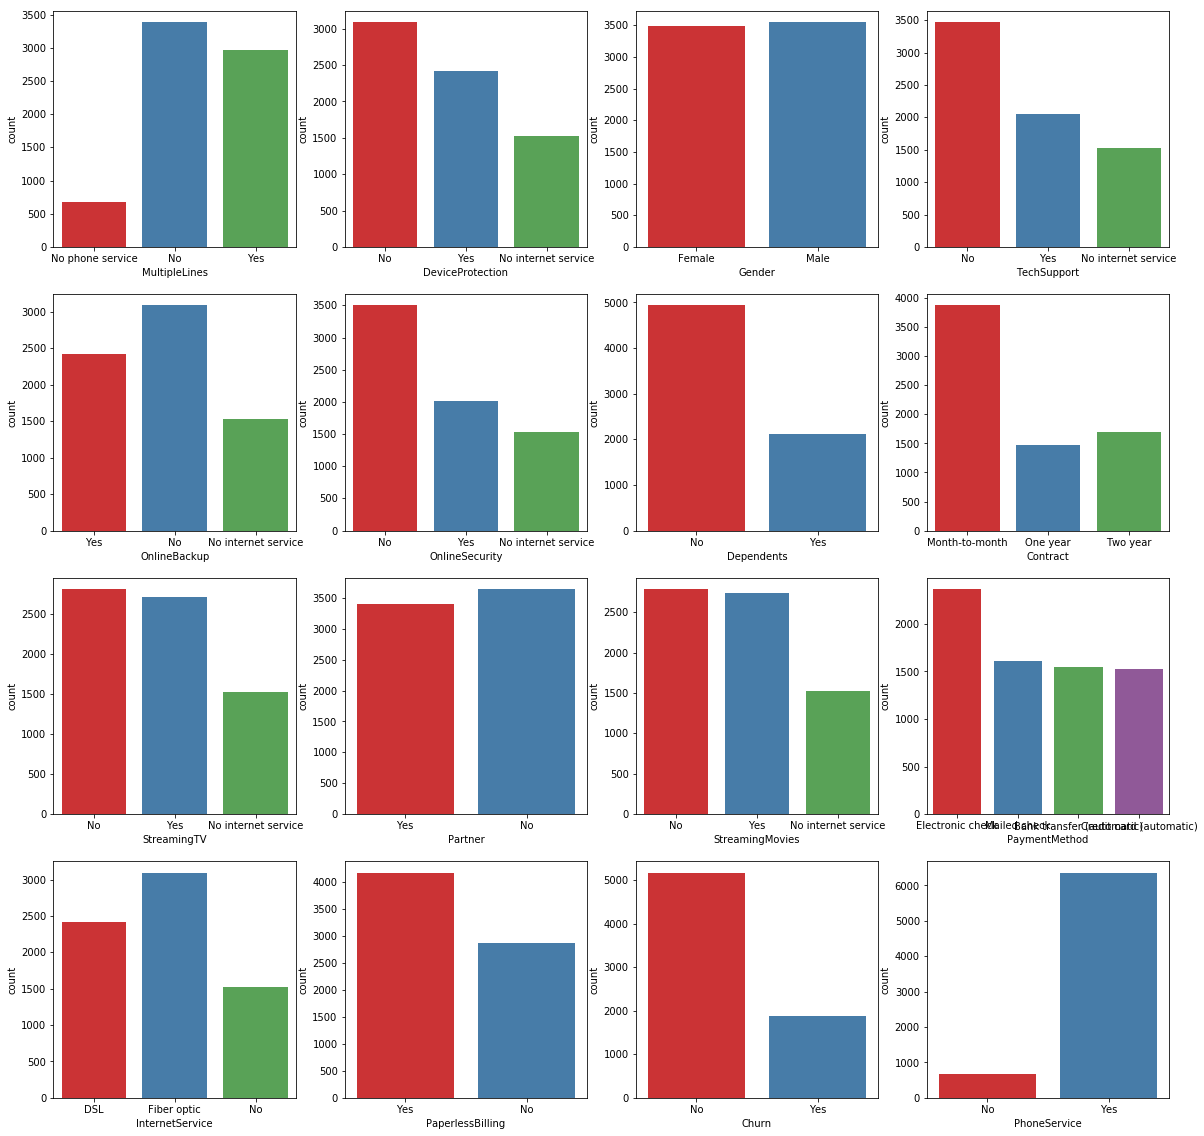

In [23]:
# Plotting the bar chart
rows = 4 ; columns = 4
f, axes = plt.subplots(rows, columns, figsize=(20, 20))
print('Univariate Analysis of each categorical Variables')
for row in range(rows):
    for column in range(columns):
        sns.countplot(dataset_churn[columns_hist_nparray[row][column]], palette = "Set1", ax = axes[row, column])

# Observations :
1) We have almost equal genders in our dataset

2) Almost 50% have partners

3) Around 30% have dependants

4) 90% of the customers have phone service

5) Around 40% customers have multiple lines

6) People prefer Fiber Optics over DSL for Internet

7) Around 30% have taken online security.Majority of Customer don't have Online security or backup

8) Close 35% prefer device protection

9) Majority of Customer don't have Tech Support

10) Around 37% have registered for Streaming TV & Movie

11) Contract - Majority of customers are subscribed for Month to Month contract (55%)

12) Majority of customers have opted Paperless billing

13) Majority of customers pay eletronic check. 43 % prefer Automatic payment (Bank Transfer and Credit Card)

14) Target Variable - "Churn" - We have unbalanced distribution (Yes - Approx 1800 ; No - Approx 5000). So Churn positive is 25% (Approx).

# Vizualizing the Numeric variables
# Histogram to see data distribution of Quantitative Variables(SeniorCitizen, tenure, MonthlyCharges, TotalCharges)

Univariate Analysis of each numerical Variables


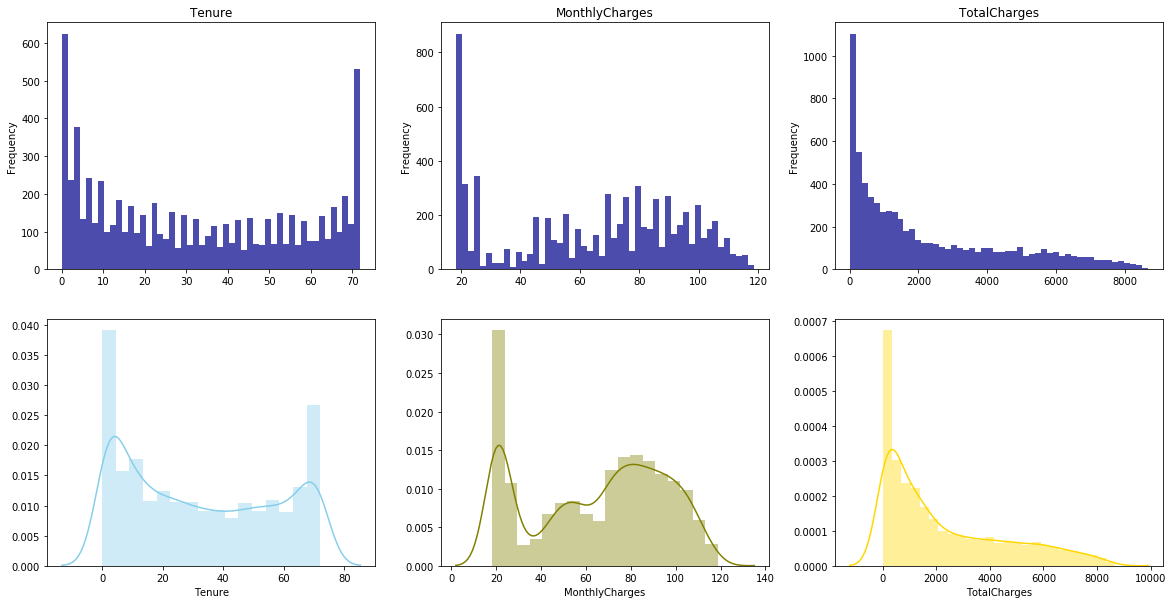

In [24]:
print('Univariate Analysis of each numerical Variables')
f, axes = plt.subplots(2, 3, figsize=(20,10))
#Charting the histogram
dataset_churn["Tenure"].plot.hist(color='DarkBlue', alpha=0.7, bins=50, title='Tenure',ax=axes[0, 0])
dataset_churn["MonthlyCharges"].plot.hist(color='DarkBlue', alpha=0.7, bins=50, title='MonthlyCharges',ax=axes[0, 1])
dataset_churn["TotalCharges"].plot.hist(color='DarkBlue', alpha=0.7, bins=50, title='TotalCharges',ax=axes[0, 2])

#Charting the density plot
sns.distplot( dataset_churn["Tenure"] , kde=True, rug=False, color="skyblue", ax=axes[1, 0])
sns.distplot( dataset_churn["MonthlyCharges"] , kde=True, rug=False, color="olive", ax=axes[1, 1])
sns.distplot( dataset_churn["TotalCharges"] , kde=True, rug=False, color="gold", ax=axes[1, 2])

# Observations:
1) Tenure:

    1.1. Not a normal distribution. Bi-Modal distribution (having 2 peaks) which means data is concentrated across two 
different groups

    1.2 We have major chunk of customers in 0-1 month period. Lot of them might be cutomers who tried the service and left 
or liked the service and continued

    1.3. Between 10 months to 65 months, we can see flat distribution of data.

    1.4. We have lot customers in 69-72 months range. They are the loyal customers

2) Monthly Charges -

    2.1. Not a normal distribution.Close to Bi-Modal distribution

    2.2. Majority of customers are paying  18to 20 dollars. Must be the service charge for basic service. Majority of 
         customers are subscribed to basic package.

    2.3. Between  70− 100 dollars, we have quite a number of customers. They might be the ones subscribed for multiple services.

3) Total Charges -

    3.1. Data is positively skewed.

    3.2. Majority of the population have spent close to $1,100 dollars

    3.3. Cutomers have spent upto $9,000 dollars

#  Barchart for the Gender (0 is No , 1 is Yes)

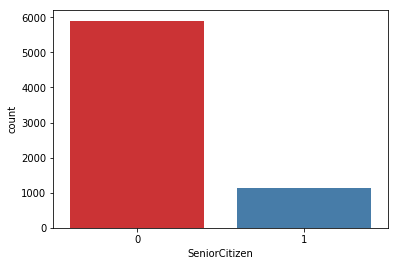

In [25]:
sns.countplot(dataset_churn['SeniorCitizen'], palette = "Set1")

###### Let's Check for Outliers using Box Plot for Tenure, MonthlyCharges, TotalCharges¶

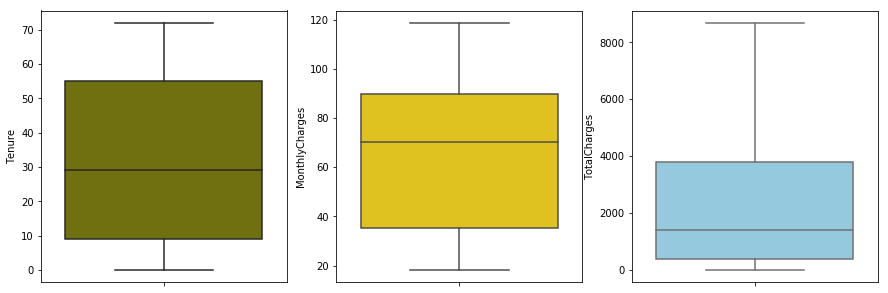

In [26]:
f, axes = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(x=dataset_churn["Tenure"], orient="v", color="olive",ax=axes[0])
sns.boxplot(x=dataset_churn["MonthlyCharges"], orient="v", color="gold",ax=axes[1])
sns.boxplot(x=dataset_churn["TotalCharges"] , orient="v", color="skyblue",ax=axes[2])

Observation - Seems like we dont have outliers !

##### Bivariate Analysis
Correlating the features with Target column (Churn) Let us start by understanding correlations between numerical features and our solution goal (Churn).

A histogram chart is useful for analyzing continous numerical variables like tenure , Monthly Charges and Total Charges where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands.

In [27]:
# Converting the categorical variable to numerical variable
dataset_churn['Churn_Num'] = dataset_churn['Churn'].map( {'Yes': 1, 'No': 0} ).astype(int)

In [28]:
# Validating the mappaing
dataset_churn[['Churn','Churn_Num']].head()

,Churn,Churn_Num
0,No,0
1,No,0
2,Yes,1
3,No,0
4,Yes,1


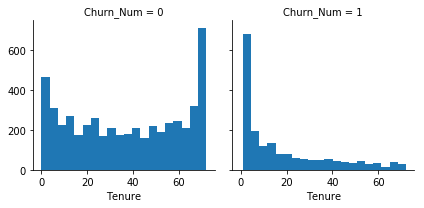

In [29]:
# Plotting Tenure Column with Churn
# Churn_num indicates customer who left the company. 0 indicates customer who stayed.
fighist = sns.FacetGrid(dataset_churn, col='Churn_Num')
fighist.map(plt.hist, 'Tenure', bins=20) 

###### Observations:
1) Customer who left the Telco are mostly customers within 1st month (600+) and churn steady declines with time.

2) If customer can be retained between 10-20 months, there are high chances, customer will stay very long. Churn decreases over time

3) Customer at 72 month tenure, mostly stayed (Churn=0).

###### Decisions:
1) We should definitely use 'Tenure' column in our model training.

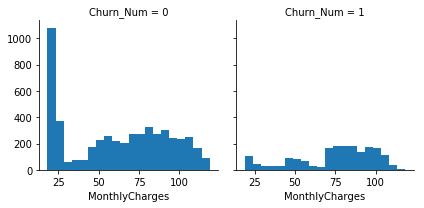

In [30]:
# Plotting MonthlyCharges Column with Churn
# Churn_num indicates customer who left the company. 0 indicates customer who stayed.
fighist = sns.FacetGrid(dataset_churn, col='Churn_Num')
fighist.map(plt.hist, 'MonthlyCharges', bins=20)

#### Observation :
Majority of customers are in 18 to 20 range and they didn't leave

Customer Leaving are mostly in the band of 75-100 who have opted for multiple services.

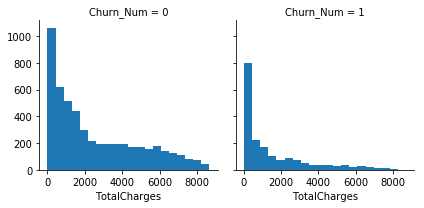

In [31]:
# Plotting TotalCharges Column with Churn
# Churn_num indicates customer who left the company. 0 indicates customer who stayed.
fighist = sns.FacetGrid(dataset_churn, col='Churn_Num')
fighist.map(plt.hist, 'TotalCharges', bins=20)

##### Observation:
It's difficult to conclude anything using this column. Total charges are Tenure * MonthlyCharges . Tenur might me high and Monthly charges may be low and vice-versa. Data is positively skewed.

# Now we will use the Categorical variables and their relationships with Churn

In [32]:
col_list = dataset_churn_cat_column
col_list.remove('Churn')

        
    

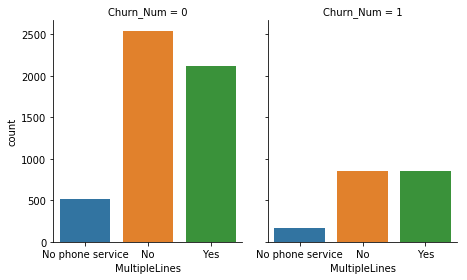

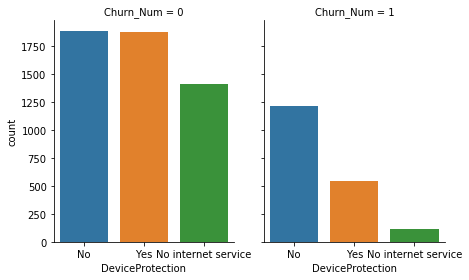

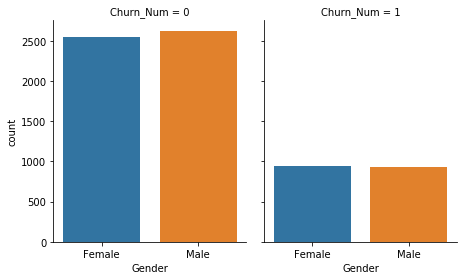

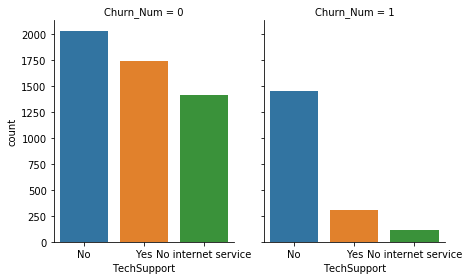

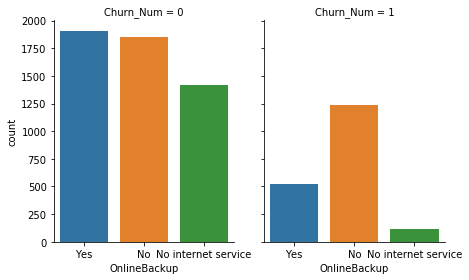

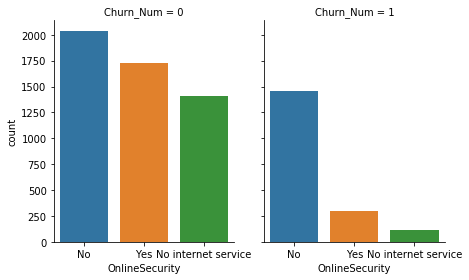

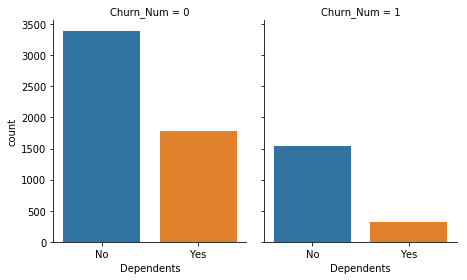

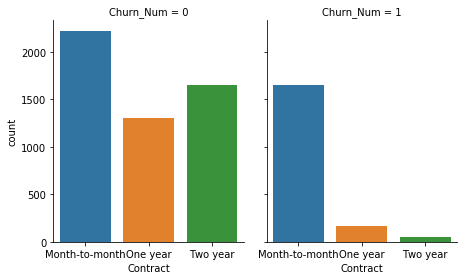

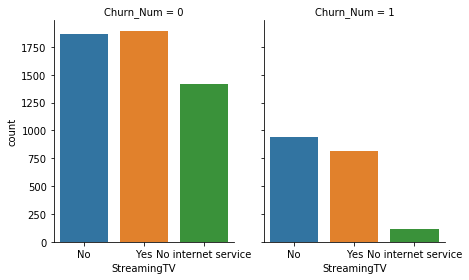

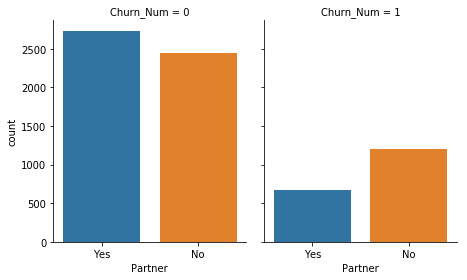

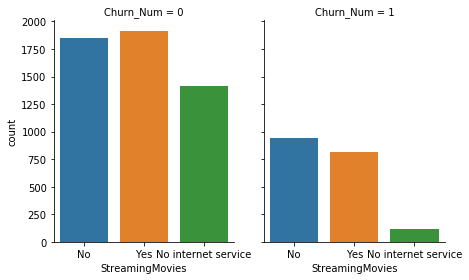

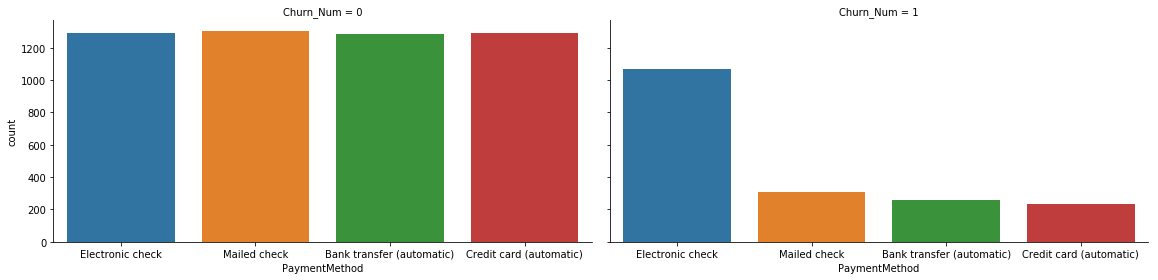

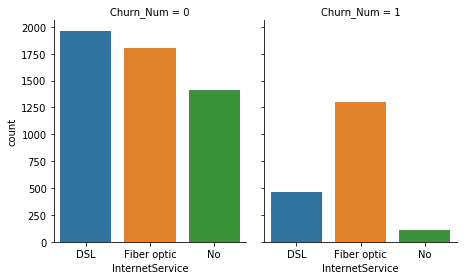

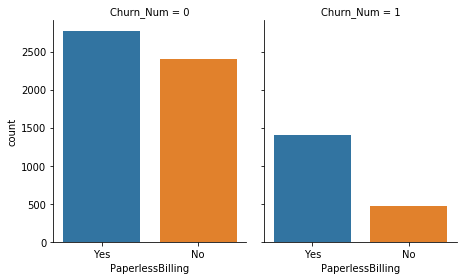

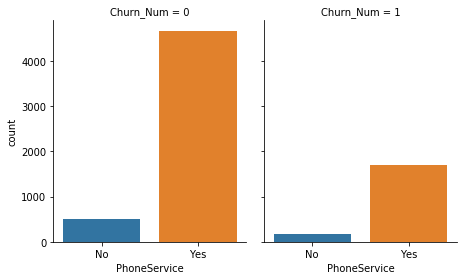

In [33]:
for col in col_list:
    if col == 'PaymentMethod':
        aspect_ratio = 2.0
    else:
        aspect_ratio = 0.8
    plot_cat_data = sns.catplot(x=col, col='Churn_Num', data = dataset_churn, kind='count', height=4, aspect=aspect_ratio)

#### Observations (Churn_Num - 1 is "Yes" ; 0 is "No") :
'Gender' : Difficult to determine Churn using this field. Counts are almost same in either category

'Partner' : Customer with partner have lower chance of leaving

'Dependents' :Customer with dependants have lower chance of leaving. We will merge Partner & Dependant Columns as 1 column

'PhoneService' & 'MultipleLines' : We will merge these columns into PhoneLines - Single & Multiple and determine

'InternetService' : Customer with Fiber Optic Interner Service have higher chances of leaving

'OnlineSecurity' & 'OnlineBackup' : We will merge these columns for better visibility

'DeviceProtection' : Customers without device protection have likely higher chances of leaving

'TechSupport' - Customer not opting for TechSupport have higher chances of leaving

'StreamingTV', 'StreamingMovies' - We will merge these columns into streaming and check again

'Contract' - Month to Month customers have likely higher chances to leave

'PaperlessBilling' - Customers with paperless billing have higher chances of leaving

'PaymentMethod' - People paying with electronic check have higher chances of leaving

### Creating new feature from existing set of columns using the above observations
#### Creating bands for numerical variables - Tenure & Monthly Charges

In [34]:
# Creating tenure band and co-relation with Churn
dataset_churn['TenureRange'] = pd.cut(dataset_churn['Tenure'], 5)
dataset_churn[['TenureRange', 'Churn_Num']].groupby(['TenureRange'], as_index=False).mean().sort_values(by='TenureRange', ascending=True)

# Replacing Age band with ordinals based on these bands
dataset_churn.loc[ dataset_churn['Tenure'] <= 8, 'TenureCat'] = 0
dataset_churn.loc[(dataset_churn['Tenure'] > 8) & (dataset_churn['Tenure'] <= 15), 'TenureCat'] = 1
dataset_churn.loc[(dataset_churn['Tenure'] > 15) & (dataset_churn['Tenure'] <= 30), 'TenureCat'] = 2
dataset_churn.loc[(dataset_churn['Tenure'] > 30) & (dataset_churn['Tenure'] <= 45 ), 'TenureCat'] = 3
dataset_churn.loc[(dataset_churn['Tenure'] > 45) & (dataset_churn['Tenure'] <= 60 ), 'TenureCat'] = 4
dataset_churn.loc[ dataset_churn['Tenure'] > 60, 'TenureCat'] = 5

In [35]:
pd.cut(dataset_churn['Tenure'], 5)
#dataset_churn

0       (-0.072, 14.4]
1         (28.8, 43.2]
2       (-0.072, 14.4]
3         (43.2, 57.6]
4       (-0.072, 14.4]
5       (-0.072, 14.4]
6         (14.4, 28.8]
7       (-0.072, 14.4]
8         (14.4, 28.8]
9         (57.6, 72.0]
10      (-0.072, 14.4]
11        (14.4, 28.8]
12        (57.6, 72.0]
13        (43.2, 57.6]
14        (14.4, 28.8]
15        (57.6, 72.0]
16        (43.2, 57.6]
17        (57.6, 72.0]
18      (-0.072, 14.4]
19        (14.4, 28.8]
20      (-0.072, 14.4]
21      (-0.072, 14.4]
22      (-0.072, 14.4]
23        (57.6, 72.0]
24        (43.2, 57.6]
25        (28.8, 43.2]
26        (43.2, 57.6]
27      (-0.072, 14.4]
28        (57.6, 72.0]
29        (14.4, 28.8]
             ...      
7013      (28.8, 43.2]
7014      (28.8, 43.2]
7015      (28.8, 43.2]
7016    (-0.072, 14.4]
7017      (43.2, 57.6]
7018    (-0.072, 14.4]
7019      (28.8, 43.2]
7020    (-0.072, 14.4]
7021    (-0.072, 14.4]
7022      (57.6, 72.0]
7023      (57.6, 72.0]
7024      (43.2, 57.6]
7025      (

In [36]:

dataset_churn[['Tenure','TenureRange','TenureCat']].head(10)

,Tenure,TenureRange,TenureCat
0,1,"(-0.072, 14.4]",0.0
1,34,"(28.8, 43.2]",3.0
2,2,"(-0.072, 14.4]",0.0
3,45,"(43.2, 57.6]",3.0
4,2,"(-0.072, 14.4]",0.0
5,8,"(-0.072, 14.4]",0.0
6,22,"(14.4, 28.8]",2.0
7,10,"(-0.072, 14.4]",1.0
8,28,"(14.4, 28.8]",2.0
9,62,"(57.6, 72.0]",5.0


In [37]:
# Creating MonthlyCharges Band and co-relation with Churn
dataset_churn['MonthlyChargesRange'] = pd.cut(dataset_churn['MonthlyCharges'], 5)
dataset_churn[['MonthlyChargesRange', 'Churn_Num']].groupby(['MonthlyChargesRange'], as_index=False).mean().sort_values(by='MonthlyChargesRange', ascending=True)

# Replacing Age band with ordinals based on these bands
dataset_churn.loc[ dataset_churn['MonthlyCharges'] <= 20, 'MonthlyChargesCat'] = 0
dataset_churn.loc[(dataset_churn['MonthlyCharges'] > 20) & (dataset_churn['MonthlyCharges'] <= 40), 'MonthlyChargesCat'] = 1
dataset_churn.loc[(dataset_churn['MonthlyCharges'] > 40) & (dataset_churn['MonthlyCharges'] <= 60), 'MonthlyChargesCat'] = 2
dataset_churn.loc[(dataset_churn['MonthlyCharges'] > 60) & (dataset_churn['MonthlyCharges'] <= 80 ), 'MonthlyChargesCat'] = 3
dataset_churn.loc[(dataset_churn['MonthlyCharges'] > 80) & (dataset_churn['MonthlyCharges'] <= 100 ), 'MonthlyChargesCat'] = 4
dataset_churn.loc[ dataset_churn['MonthlyCharges'] > 100, 'MonthlyChargesCat'] = 5

#Checking the categories
dataset_churn[['MonthlyCharges','MonthlyChargesRange','MonthlyChargesCat']].head(10)

,MonthlyCharges,MonthlyChargesRange,MonthlyChargesCat
0,29.85,"(18.15, 38.35]",1.0
1,56.95,"(38.35, 58.45]",2.0
2,53.85,"(38.35, 58.45]",2.0
3,42.30,"(38.35, 58.45]",2.0
4,70.70,"(58.45, 78.55]",3.0
5,99.65,"(98.65, 118.75]",4.0
6,89.10,"(78.55, 98.65]",4.0
7,29.75,"(18.15, 38.35]",1.0
8,104.80,"(98.65, 118.75]",5.0
9,56.15,"(38.35, 58.45]",2.0


### Creating new derived columns for Categorical variables

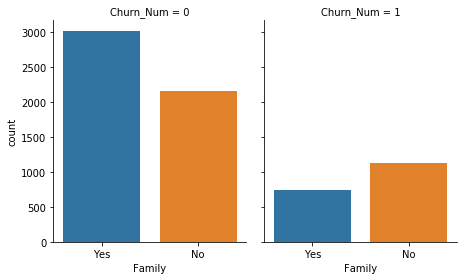

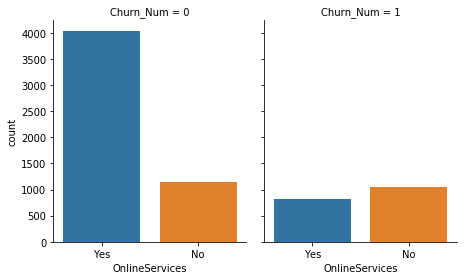

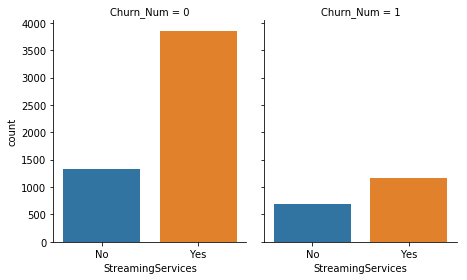

In [38]:
#Creating a new column for family. If a customer has dependant or Partner, I am considering it as family .
list_family = []
for rows in range(len(dataset_churn['Partner'])):
    if ((dataset_churn['Partner'][rows] == 'No') and (dataset_churn['Dependents'][rows] == 'No')):
        list_family.append('No')
    else:
        list_family.append('Yes')
dataset_churn['Family'] = list_family
#print(datset_churn[['Partner', 'Dependents', 'Family' ]].head(10))

#Creating a new column for Online Services (Online Security & Online Backup) . If a customer has Online Security or Online Backup services
#then , I am considering it as "Yes" else "No"
list_online_services = []
for rows_os in range(len(dataset_churn['OnlineSecurity'])):
    if ((dataset_churn['OnlineSecurity'][rows_os] == 'No') and (dataset_churn['OnlineBackup'][rows_os] == 'No')):
        list_online_services.append('No')
    else:
        list_online_services.append('Yes')
dataset_churn['OnlineServices'] = list_online_services

#print(datset_churn[['OnlineSecurity', 'OnlineBackup', 'OnlineServices' ]].head(10))
 
#Creating a new column for Streaming Services (StreamingTV & StreamingMovies) . If a customer has StreamingTV or StreamingMovies
#then , I am considering it as "Yes" else "No"
list_streaming_services = []
for rows_stv in range(len(dataset_churn['StreamingTV'])):
    if ((dataset_churn['StreamingTV'][rows_stv] == 'No') and (dataset_churn['StreamingMovies'][rows_stv] == 'No')):
        list_streaming_services.append('No')
    else:
        list_streaming_services.append('Yes')
dataset_churn['StreamingServices'] = list_streaming_services

#print(datset_churn[['StreamingTV', 'StreamingMovies', 'StreamingServices' ]].head(10))

plot_cat_data = sns.catplot(x='Family', col='Churn_Num', data = dataset_churn, kind='count', height=4, aspect=0.8)
plot_cat_data = sns.catplot(x='OnlineServices', col='Churn_Num', data = dataset_churn, kind='count', height=4, aspect=0.8)
plot_cat_data = sns.catplot(x='StreamingServices', col='Churn_Num', data = dataset_churn, kind='count', height=4, aspect=0.8)


#### Observation
Customers with family are less likely to Churn

Customers not opted for online services (online backup or security) have slightly higher chances of churn

Customer opted for Streaming Services seems to have slightly higher chances of churn

### Preparing Columns for Classification
##### Converting the Object/Categorical Variable to Numerical Variable

In [39]:
dataset_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
CustomerID             7043 non-null object
Gender                 7043 non-null object
SeniorCitizen          7043 non-null int64
Partner                7043 non-null object
Dependents             7043 non-null object
Tenure                 7043 non-null int64
PhoneService           7043 non-null object
MultipleLines          7043 non-null object
InternetService        7043 non-null object
OnlineSecurity         7043 non-null object
OnlineBackup           7043 non-null object
DeviceProtection       7043 non-null object
TechSupport            7043 non-null object
StreamingTV            7043 non-null object
StreamingMovies        7043 non-null object
Contract               7043 non-null object
PaperlessBilling       7043 non-null object
PaymentMethod          7043 non-null object
MonthlyCharges         7043 non-null float64
TotalCharges           7043 non-null float64
Churn        

In [40]:
#Converting Gender column to numeric value
#datset_churn['Gender'].unique() # Print unique values in the column
dataset_churn['Gender_Num'] = dataset_churn['Gender'].map( {'Female': 1, 'Male': 0} ).astype(int) #Map Categorical to Numerical Values
dataset_churn[['Gender','Gender_Num']].head(2) # Test the mapping

,Gender,Gender_Num
0,Female,1
1,Male,0


In [41]:
# For Partner & Dependant , we created Family Column . Converting Family column to numeric value
#datset_churn['Family'].unique() # Print unique values in the column
dataset_churn['Family_Num'] = dataset_churn['Family'].map( {'Yes': 1, 'No': 0} ).astype(int) #Map Categorical to Numerical Values
dataset_churn[['Family','Family_Num']].head(2) # Test the mapping

,Family,Family_Num
0,Yes,1
1,No,0


In [42]:
dataset_churn['PhoneService_Num'] = dataset_churn['PhoneService'].map( {'Yes': 1, 'No': 0} ).astype(int)
dataset_churn['MultipleLines_Num'] = dataset_churn['MultipleLines'].map( {'No': 0, 'Yes': 1, 'No phone service':2} ).astype(int)
dataset_churn['InternetService_Num'] = dataset_churn['InternetService'].map( {'DSL': 0, 'Fiber optic': 1, 'No':2} ).astype(int)
dataset_churn['OnlineServices_Num'] = dataset_churn['OnlineServices'].map( {'Yes': 1, 'No': 0} ).astype(int)

dataset_churn['DeviceProtection_Num'] = dataset_churn['DeviceProtection'].map( {'No': 0, 'Yes': 1, 'No internet service':2} ).astype(int)
dataset_churn['StreamingServices_Num'] = dataset_churn['StreamingServices'].map( {'Yes': 1, 'No': 0} ).astype(int)
dataset_churn['TechSupport_Num'] = dataset_churn['TechSupport'].map( {'No': 0, 'Yes': 1, 'No internet service':2} ).astype(int)
dataset_churn['Contract_Num'] = dataset_churn['Contract'].map( {'Month-to-month': 0, 'One year': 1, 'Two year': 2} ).astype(int)
dataset_churn['PaperlessBilling_Num'] = dataset_churn['PaperlessBilling'].map( {'Yes': 1, 'No': 0} ).astype(int)
dataset_churn['PaymentMethod_Num'] = dataset_churn['PaymentMethod'].map( {'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2 , 'Credit card (automatic)' : 3} ).astype(int)

In [43]:
dataset_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
CustomerID               7043 non-null object
Gender                   7043 non-null object
SeniorCitizen            7043 non-null int64
Partner                  7043 non-null object
Dependents               7043 non-null object
Tenure                   7043 non-null int64
PhoneService             7043 non-null object
MultipleLines            7043 non-null object
InternetService          7043 non-null object
OnlineSecurity           7043 non-null object
OnlineBackup             7043 non-null object
DeviceProtection         7043 non-null object
TechSupport              7043 non-null object
StreamingTV              7043 non-null object
StreamingMovies          7043 non-null object
Contract                 7043 non-null object
PaperlessBilling         7043 non-null object
PaymentMethod            7043 non-null object
MonthlyCharges           7043 non-null float64
TotalCharges        

## Now we will delete the non-required rows and prepare the dataset for classification

In [44]:
# Take a copy of dataset
dataset_churn_copy = dataset_churn.copy()

In [45]:
#Dropping the Categorical columns and keeping their equivalent numeric column
columns_to_drop = ['Gender', 'Partner', 'Dependents', 'Tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn', 'Family', 'OnlineServices', 'StreamingServices']
dataset_churn = dataset_churn.drop(columns_to_drop, axis=1)

#Re-arranging the columns as per origial dataset
dataset_churn = dataset_churn[['CustomerID', 'Gender_Num', 'SeniorCitizen', 'Family_Num', 'TenureCat', 'PhoneService_Num', 'MultipleLines_Num', 'InternetService_Num', 'OnlineServices_Num', 'DeviceProtection_Num', 'TechSupport_Num', 'StreamingServices_Num', 'Contract_Num', 'PaperlessBilling_Num', 'PaymentMethod_Num', 'MonthlyChargesCat', 'Churn_Num']]
dataset_churn = dataset_churn.rename(columns={'Gender_Num' : 'Gender', 
                             'Family_Num' : 'Family',
                             'PhoneService_Num' : 'PhoneService',
                             'MultipleLines_Num': 'MultipleLines', 
                             'InternetService_Num' : 'InternetService', 
                             'OnlineServices_Num' : 'OnlineServices', 
                             'DeviceProtection_Num' : 'DeviceProtection',
                             'TechSupport_Num' : 'TechSupport', 
                             'StreamingServices_Num' : 'StreamingServices', 
                             'Contract_Num' : 'Contract', 
                             'PaperlessBilling_Num' : 'PaperlessBilling', 
                             'PaymentMethod_Num' : 'PaymentMethod', 
                             'MonthlyCharges' : 'MonthlyCharges', 
                             'Churn_Num' :  'Churn' })

In [46]:
dataset_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
CustomerID           7043 non-null object
Gender               7043 non-null int32
SeniorCitizen        7043 non-null int64
Family               7043 non-null int32
TenureCat            7043 non-null float64
PhoneService         7043 non-null int32
MultipleLines        7043 non-null int32
InternetService      7043 non-null int32
OnlineServices       7043 non-null int32
DeviceProtection     7043 non-null int32
TechSupport          7043 non-null int32
StreamingServices    7043 non-null int32
Contract             7043 non-null int32
PaperlessBilling     7043 non-null int32
PaymentMethod        7043 non-null int32
MonthlyChargesCat    7043 non-null float64
Churn                7043 non-null int32
dtypes: float64(2), int32(13), int64(1), object(1)
memory usage: 577.8+ KB


In [47]:
dataset_churn.head(10) # Taking a quick look into the new data

,CustomerID,Gender,SeniorCitizen,Family,TenureCat,PhoneService,MultipleLines,InternetService,OnlineServices,DeviceProtection,TechSupport,StreamingServices,Contract,PaperlessBilling,PaymentMethod,MonthlyChargesCat,Churn
0,7590-VHVEG,1,0,1,0.0,0,2,0,1,0,0,0,0,1,0,1.0,0
1,5575-GNVDE,0,0,0,3.0,1,0,0,1,1,0,0,1,0,1,2.0,0
2,3668-QPYBK,0,0,0,0.0,1,0,0,1,0,0,0,0,1,1,2.0,1
3,7795-CFOCW,0,0,0,3.0,0,2,0,1,1,1,0,1,0,2,2.0,0
4,9237-HQITU,1,0,0,0.0,1,0,1,0,0,0,0,0,1,0,3.0,1
5,9305-CDSKC,1,0,0,0.0,1,1,1,0,1,0,1,0,1,0,4.0,1
6,1452-KIOVK,0,0,1,2.0,1,1,1,1,0,0,1,0,1,3,4.0,0
7,6713-OKOMC,1,0,0,1.0,0,2,0,1,0,0,0,0,0,1,1.0,0
8,7892-POOKP,1,0,1,2.0,1,1,1,0,1,1,1,0,1,0,5.0,1
9,6388-TABGU,0,0,1,5.0,1,0,0,1,0,0,0,1,0,2,2.0,0


In [48]:
test = dataset_churn

In [49]:
X = dataset_churn.iloc[:,1:16].values # Feature Variable
y = dataset_churn.iloc[:,16].values # Target Variable

#Dividing data into test & train splitting 70% data for training anf 30% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 4930 samples in the training set and 2113 samples in the test set


In [51]:
data_final = dataset_churn.iloc[:,1:17]

In [53]:
X[0]

array([1., 0., 1., 0., 0., 2., 0., 1., 0., 0., 0., 0., 1., 0., 1.])

In [54]:
data_final_vars=data_final.columns.values.tolist()
y=['Churn']
X=[i for i in data_final_vars if i not in y]

# Feature Selection
Feature ranking with recursive feature elimination.

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [52]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 16)
rfe = rfe.fit(data_final[X], data_final[y] )

In [52]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# Implementing the model


In [53]:
import statsmodels.api as sm
logit_model=sm.Logit(data_final[y],data_final[X])
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.418812
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7028
Method:                           MLE   Df Model:                           14
Date:                Thu, 29 Nov 2018   Pseudo R-squ.:                  0.2762
Time:                        22:06:37   Log-Likelihood:                -2949.7
converged:                       True   LL-Null:                       -4075.1
                                        LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Gender               -0.0222      0.064     -0.349      0.727      -0.147       0.103
SeniorCi

In [54]:
X = ['Gender','SeniorCitizen','Family','TenureCat','PhoneService','InternetService','OnlineServices','DeviceProtection',
 'TechSupport','StreamingServices','Contract','PaperlessBilling','PaymentMethod','MonthlyChargesCat']


In [55]:
logit_model=sm.Logit(data_final[y],data_final[X])
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.418819
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7029
Method:                           MLE   Df Model:                           13
Date:                Thu, 29 Nov 2018   Pseudo R-squ.:                  0.2761
Time:                        22:06:44   Log-Likelihood:                -2949.7
converged:                       True   LL-Null:                       -4075.1
                                        LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Gender               -0.0188      0.063     -0.300      0.764      -0.142       0.104
SeniorCi

# Logistic Regression Classifier

In [55]:
print(X_train[0])

[0. 0. 1. 5. 1. 0. 1. 1. 1. 0. 1. 1. 1. 2. 5.]


In [54]:
print(y_train)

[0 1 0 ... 1 0 0]


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
# Calculate the accuracy
y_pred = logreg.predict(X_test)

In [60]:
y_pred[0]
X_test[0]

array([0., 0., 0., 1., 1., 0., 2., 1., 2., 2., 1., 1., 0., 1., 0.])

In [62]:
testval = logreg.predict_proba(X_test)[:,1]

In [63]:
testval


array([0.0593042 , 0.21904011, 0.31828184, ..., 0.02817452, 0.05761184,
       0.00864075])

In [64]:
score = pd.DataFrame(logreg.predict_proba(X_test)[:,1], columns = ['SCORE'])
score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10,labels=range(10,0,-1))
score['DECILE'] = score['DECILE'].astype(float)


In [66]:
score.head()

,SCORE,DECILE
0,0.059304,8.0
1,0.219040,5.0
2,0.318282,4.0
3,0.702969,1.0
4,0.231825,5.0


In [52]:
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on training set: 0.80


In [54]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


# Cross Validation

In [56]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.802


In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1390  128]
 [ 288  307]]


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.92      0.87      1518
          1       0.71      0.52      0.60       595

avg / total       0.79      0.80      0.79      2113



Compute precision, recall, F-measure and support
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

### Classification
#### We will run all classifiers to have an initial look at the performance

#### Defining function for Confusion Matrix , Precision, Recall and F1 Score

In [67]:
#X = dataset_churn.iloc[:,1:16].values # Feature Variable
#y = dataset_churn.iloc[:,16].values # Target Variable

#Dividing data into test & train splitting 70% data for training anf 30% for test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
#print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

In [50]:
#Creating function for Confusion Matrix , Precsion, Recall and F1 Score
def plot_confusion_matrix(classifier, y_test, y_pred_test):
    cm = confusion_matrix(y_test, y_pred_test)
    
    print("\n",classifier,"\n")
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='RdBu')
    classNames = ['Churn-No','Churn-Yes']
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), 
                     horizontalalignment='center', color='White')
    
    plt.show()
        
    tn, fp, fn, tp = cm.ravel()

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    F1 = 2*recall*precision/(recall+precision)

    print('Recall={0:0.3f}'.format(recall),'\nPrecision={0:0.3f}'.format(precision))
    print('F1={0:0.3f}'.format(F1))
    return;



In [51]:
from sklearn.metrics import average_precision_score, precision_recall_curve
def plot_prec_rec_curve(classifier, y_test, y_pred_score):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_score)
    average_precision = average_precision_score(y_test, y_pred_score)

    print('Average precision-recall score: {0:0.3f}'.format(
          average_precision))

    plt.plot(recall, precision, label='area = %0.3f' % average_precision, color="green")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="best")
    plt.show()

#### Master Classification Engine


 LogisticRegression 



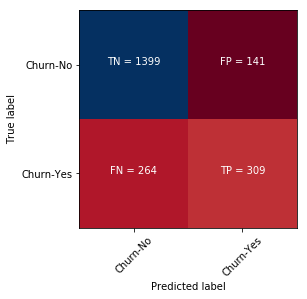

Recall=0.539 
Precision=0.687
F1=0.604
Average precision-recall score: 0.664


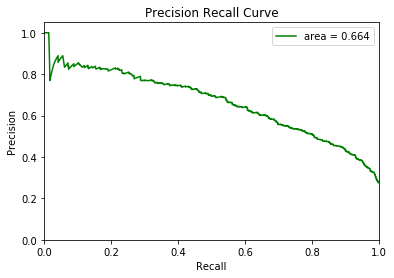


 SVC 



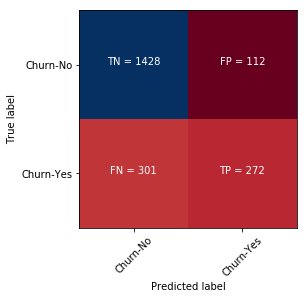

Recall=0.475 
Precision=0.708
F1=0.568
Average precision-recall score: 0.652


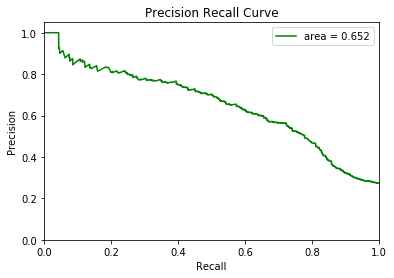


 DecisionTreeClassifier 



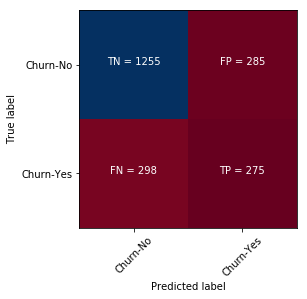

Recall=0.480 
Precision=0.491
F1=0.485
Average precision-recall score: 0.380


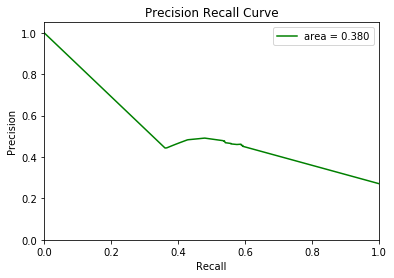


 RandomForestClassifier 



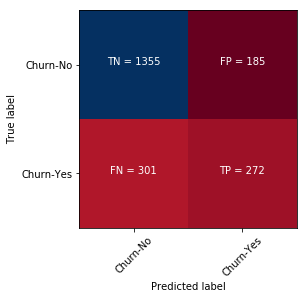

Recall=0.475 
Precision=0.595
F1=0.528
Average precision-recall score: 0.534


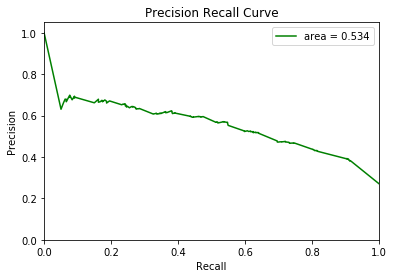

In [52]:
# Making a list of all classifiers
classifier_model = [LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

# Creating empty list to store the performance details
classifier_model_list= []
classifier_accuracy_test = []
classifier_accuracy_train = []
f1score = []
precisionscore = []
recallscore = []
avg_pre_rec_score = []
cv_score = []

for classifier_list in classifier_model:
    classifier = classifier_list
 
    # Fitting the training set into classification model
    classifier.fit(X_train,y_train)
    
    # Predicting the output on test datset
    y_pred_test = classifier.predict(X_test)    
    score_test = accuracy_score(y_test, y_pred_test)
    
    # Predicting the output on training datset
    y_pred_train = classifier.predict(X_train) 
    score_train = accuracy_score(y_train, y_pred_train)
    
    # Cross Validation Score on training test
    scores = cross_val_score(classifier, X_train,y_train, cv=10)
    cv_score.append(scores.mean())
    
    #Keeping the model and accuracy score into a list
    classifier_model_list.append(classifier_list.__class__.__name__)
    classifier_accuracy_test.append(round(score_test,4))
    classifier_accuracy_train.append(round(score_train,4))
    
    #Precision, Recall and F1 score
    f1score.append(f1_score(y_test, y_pred_test))
    precisionscore.append(precision_score(y_test, y_pred_test))
    recallscore.append(recall_score(y_test, y_pred_test))
    
    #Calculating Average Precision Recall Score
    try:
        y_pred_score = classifier.decision_function(X_test)
    except:
        y_pred_score = classifier.predict_proba(X_test)[:,1]
    
    from sklearn.metrics import average_precision_score
    average_precision = average_precision_score(y_test, y_pred_score)
    avg_pre_rec_score.append(average_precision)
    #Confusion Matrix
    plot_confusion_matrix(classifier_list.__class__.__name__, y_test, y_pred_test)
    plot_prec_rec_curve(classifier_list.__class__.__name__, y_test, y_pred_score)


In [54]:
del y_train

In [55]:
del X
del y
del X_train
del X_test
del y_test

In [56]:
X = dataset_churn.iloc[:,1:16].values # Feature Variable
y = dataset_churn.iloc[:,16].values # Target Variable

#Dividing data into test & train splitting 70% data for training anf 30% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 4930 samples in the training set and 2113 samples in the test set


In [57]:
rfc=RandomForestClassifier(random_state=42)

In [58]:
param_grid = { 
    'n_estimators': [100,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [59]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid,n_jobs=-1, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [65]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='entropy')

In [66]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [68]:
predictions1 = rfc1.predict(X_test)

In [69]:
print (" Confusion matrix ", confusion_matrix(y_test, predictions1))

 Confusion matrix  [[1405  119]
 [ 321  268]]


In [70]:
print ( "Test Accuracy  :: ", accuracy_score(y_test, predictions1))

Test Accuracy  ::  0.7917652626597255


In [71]:
print(classification_report(y_test, predictions1))

             precision    recall  f1-score   support

          0       0.81      0.92      0.86      1524
          1       0.69      0.46      0.55       589

avg / total       0.78      0.79      0.78      2113



In [ ]:
# for integration we can save trained model with using package joblib (joblib.dump & joblib.load)

In [76]:
# Calculate feature importances
importances = rfc1.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [dataset_churn.columns[i] for i in indices]

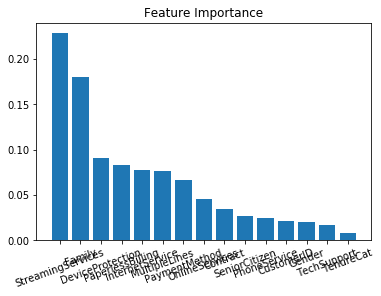

In [81]:
# Barplot: Add bars
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=20, fontsize = 10)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

### Model can be further improved using the strategies discussed in next paragragh.

Handling Imbalaced Dataset :

1.Increasing the number of instances of the minority class (This case Churn = 'Yes') . We need more data with Churn Class as "Yes".

2.Decreasing the number of instances of majority class

3.Random Under-Sampling

4.Random Over-Sampling

5.Cluster-Based Over Sampling

6.Synthetic Minority Over-sampling Technique(SMOTE)

https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/


In [ ]:
from sklearn.preprocessing import RobustScaler
# Define the scaler 
scaler = preprocessing.RobustScaler()

# Scale the train set
x_train = scaler.fit_transform(x_train)

# Scale the test set
x_test = scaler.fit_transform(x_test)